In [2]:
import numpy as np
import pandas as pd
from myfunctions import BPstar
from myfunctions import BPstarmodel
import matplotlib.pyplot as plt
import os
from est_model import estimate_model

## Initialisation, simulation, et replications

### Paramètres de la simulation:

In [3]:
#initialisations des parametres du modele pour simulation
A = np.array([[0.3, 0.2],[0.1, 0.3]])
B = np.array([[0.1, 0.2],[0.3, 0.2]])
omeg = np.array([0.5, 0.3])
delt = 0.4
n = 200 #longeure de la trajectoire

works well:
#initialisations des parametres du modele pour simulation
A = np.array([[0.2, 0],[0, 0.4]])
B = np.array([[0.5, 0],[0, 0.3]])
omeg = np.array([0.3, 0.5])
delt = 0.7
n = 500 #longeure de la trajectoire

### Simulation d'une trajectoire

In [4]:
y = BPstarmodel(A, B, omeg, n, delt) #simuler une trajectoire

In [5]:
np.savetxt("databp.csv", y.T, delimiter=",")

#### Graphes

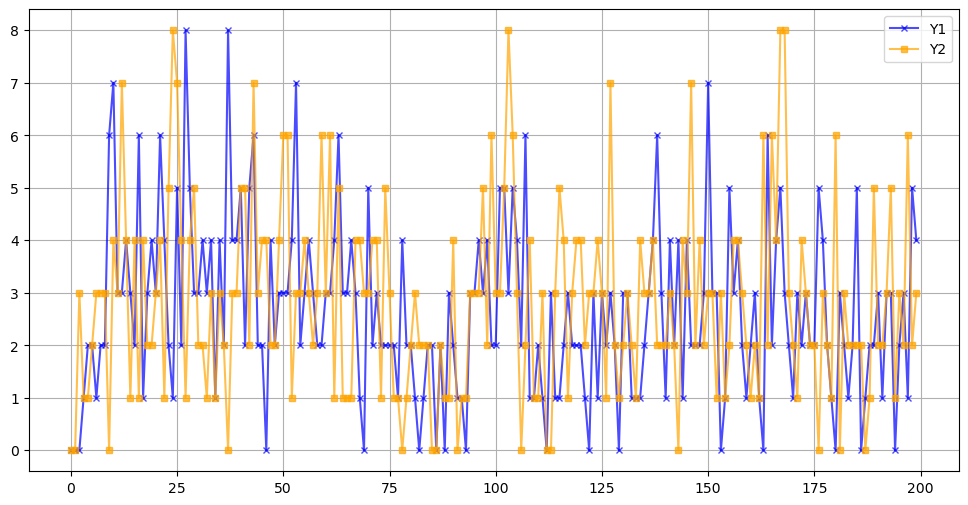

In [6]:
#graphe des series superposees
plt.figure(figsize=(12, 6))
plt.plot(y[0,:], label='Y1', marker='x', linestyle='-', color='b', alpha=0.7, markersize = 4)
plt.plot(y[1,:], label='Y2', marker='s', linestyle='-', color='orange', alpha=0.7, markersize = 4)
plt.legend()
plt.grid(True)
plt.show()

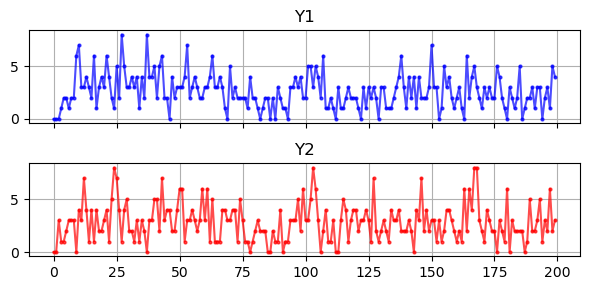

In [7]:
#graphe des series separees
fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True) #division de la figure en 2 lignes une colonne
#sharex: les figures partagent le meme axe des x

#Variable 1
axs[0].plot(y[0,:], label='Y1', marker='o', linestyle='-', color='blue', alpha=0.7, markersize = 2)
axs[0].grid(True)
axs[0].set_title('Y1')
#Variable 2
axs[1].plot(y[1,:], label='Y2', marker='o', linestyle='-', color='red', alpha=0.7, markersize = 2)
axs[1].grid(True)
axs[1].set_title('Y2')

plt.tight_layout()
plt.show()

### Replications


In [8]:
parameters = {
    'M1': {
        'A': np.array([[0.3, 0.2], [0.1, 0.3]]),
        'B': np.array([[0.1, 0.2], [0.3, 0.2]]),
        'omeg': np.array([0.5, 0.3]),
        'delt': 0.4
    },
    'M2': {
        'A': np.array([[0.2, 0], [0, 0.4]]),
        'B': np.array([[0.5, 0], [0, 0.3]]),
        'omeg': np.array([0.3, 0.5]),
        'delt': 0.7
    },
    'M3': {
        'A': np.array([[0.2, 0.0], [0.0, 0.4]]),
        'B': np.array([[0.5, 0.1], [0.3, 0.2]]),
        'omeg': np.array([0.3, 0.5]),
        'delt': 0.7
    },
    'M4': {
        'A': np.array([[0.2, 0.3], [0.4, 0.2]]),
        'B': np.array([[0.2, 0], [0.3, 0]]),
        'omeg': np.array([0.5, 0.3]),
        'delt': -0.5
    }
}

In [9]:
#nombre de replications
nrep = 200

In [10]:
#on va faire des replications pour des tailles de series differentes
sizes = [200, 500, 1000]

In [11]:
#on cree un sous fichier pour y sauvegarder les replications
base_folder = "replications"
os.makedirs(base_folder, exist_ok=True)

In [12]:
RepEst = np.zeros((10, nrep))
np.shape(RepEst)

(10, 200)

NameError: name 'size_folder' is not defined

In [14]:
base_folder = "replications"
for model in parameters: #on va parcourir les modeles
    model_folder = os.path.join(base_folder, model)        
    print(model_folder)
    for size in sizes: #on regarde les tailles des series
        size_folder = os.path.join(model_folder, f"size_{size}")
        print(size_folder)
        RepEst = np.zeros((10,nrep))
        for i in range(1,nrep+1):
            filename = f"databp_{str(i).zfill(3)}.csv"
            filepath = os.path.join(size_folder, filename)
            if os.path.exists(filepath):
                data = np.loadtxt(filepath, delimiter=',')
                print(f"loaded model: {model}, size: {size}, replication: {filename} with shape {data.shape}")
                omega, A, B = estimate_model(data, 3)
                print(f"model estimated from data {model} {size} :{str(i).zfill(3)}")
                RepEst[0,i-1], RepEst[5,i-1] = omega[0], omega[1]
                RepEst[1,i-1], RepEst[2,i-1] = A[0,0], A[0,1]
                RepEst[6,i-1], RepEst[7,i-1] = A[1,0], A[1,1]
                RepEst[3,i-1], RepEst[4,i-1] = B[0,0], B[0,1]
                RepEst[8,i-1], RepEst[9,i-1] = B[1,0], B[1,1]
                estimname = f"repestim_{model}_{size}.csv"
                estimpath = os.path.join(size_folder, estimname)
                np.savetxt(estimpath, RepEst, delimiter=",")
                print(f"estimation saved to {estimpath}")
                
            else:
                print(f"File {filename} does not exist.")


replications\M1
replications\M1\size_200
loaded model: M1, size: 200, replication: databp_001.csv with shape (200, 2)
model estimated from data M1 200 :001
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_002.csv with shape (200, 2)
model estimated from data M1 200 :002
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_003.csv with shape (200, 2)
model estimated from data M1 200 :003
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_004.csv with shape (200, 2)
model estimated from data M1 200 :004
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_005.csv with shape (200, 2)
model estimated from data M1 200 :005
estimation saved to replications\M1\size_200\repestim_M1_200.csv
loaded model: M1, size: 200, replication: databp_006.csv wi

In [15]:
print(filepath)

replications\M4\size_1000\databp_200.csv


In [21]:
base_folder = "replications"

model = 'M4'
size = 1000

model_folder = os.path.join(base_folder, model)
size_folder = os.path.join(model_folder, f"size_{size}")
filename = f"repestim_{model}_{size}.csv"
filepath = os.path.join(size_folder, filename)

repestim = np.loadtxt(filepath, delimiter=',')
print(f"Shape of the loaded data: {filepath} {np.shape(repestim)}")

Shape of the loaded data: replications\M4\size_1000\repestim_M4_1000.csv (10, 200)


In [22]:
#on defini les vecteurs d'estimation specifiques aux modeles avec les parametres d'interet seulement
#M1 prend tout pas besoin
if model == 'M1':
    print(model)
    meanest = repestim.mean(axis=1)
    stdest = repestim.std(axis=1)
    minest = repestim.min(axis=1)
    maxest = repestim.max(axis=1)
    medianest = np.median(repestim, axis=1)
    num_params = 10
    real_params = [0.5, 0.3, 0.2, 0.1, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2]


if model == 'M2':
    #M2 A et B diag
    print(model)
    repestimM2 = np.zeros((6,nrep))
    repestimM2[0,:] = repestim[0,:] #omega1
    repestimM2[1,:] = repestim[1,:] #alpha11
    repestimM2[2,:] = repestim[3,:] #beta11
    repestimM2[3,:] = repestim[5,:] #omega2
    repestimM2[4,:] = repestim[7,:] #alpha22
    repestimM2[5,:] = repestim[9,:] #beta22

    meanest = repestimM2.mean(axis=1)
    stdest = repestimM2.std(axis=1)
    minest = repestimM2.min(axis=1)
    maxest = repestimM2.max(axis=1)
    medianest = np.median(repestimM2, axis=1)
    num_params = 6
    real_params = [0.3, 0.2, 0.5, 0.5, 0.4, 0.3]

if model == 'M3':
    #M3 A diag B non-diag
    print(model)
    repestimM3 = np.zeros((8,nrep))
    repestimM3[0,:] = repestim[0,:] #omega1
    repestimM3[1,:] = repestim[1,:] #alpha11
    repestimM3[2,:] = repestim[3,:] #beta11
    repestimM3[3,:] = repestim[4,:] #beta12
    repestimM3[4,:] = repestim[5,:] #omega2
    repestimM3[5,:] = repestim[7,:] #alpha22
    repestimM3[6,:] = repestim[8,:] #beta21
    repestimM3[7,:] = repestim[9,:] #beta22
        
    meanest = repestimM3.mean(axis=1)
    stdest = repestimM3.std(axis=1)
    minest = repestimM3.min(axis=1)
    maxest = repestimM3.max(axis=1)
    medianest = np.median(repestimM3, axis=1)
    num_params = 8
    real_params = [0.3, 0.2, 0.5, 0.1, 0.5, 0.4, 0.3, 0.2]

if model == 'M4':
    #M4 A non diag B diag
    print(model)
    repestimM4 = np.zeros((8,nrep))
    repestimM4[0,:] = repestim[0,:] #omega1
    repestimM4[1,:] = repestim[1,:] #alpha11
    repestimM4[2,:] = repestim[2,:] #alpha12
    repestimM4[3,:] = repestim[3,:] #beta11
    repestimM4[4,:] = repestim[5,:] #omega2
    repestimM4[5,:] = repestim[6,:] #alpha21
    repestimM4[6,:] = repestim[7,:] #alpha22
    repestimM4[7,:] = repestim[9,:] #beta22
        
    meanest = repestimM4.mean(axis=1)
    stdest = repestimM4.std(axis=1)
    minest = repestimM4.min(axis=1)
    maxest = repestimM4.max(axis=1)
    medianest = np.median(repestimM4, axis=1)
    num_params = 8
    real_params = [0.5, 0.2, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3]


    ###COMMENT IMPORTER DU DICTIONNAIRE

M4


In [23]:
# Print the computed statistics
print(f"Mean: {meanest}")
print(f"Standard Deviation: {stdest}")
print(f"Min: {minest}")
print(f"Max: {maxest}")
print(f"Median: {medianest}")


Mean: [ 0.53626394  0.19957611  0.28326147  0.19675875  0.33944255  0.33482953
  0.24503028 -0.00241547]
Standard Deviation: [0.2137086  0.3550217  0.27152837 0.03522512 0.26349219 0.45185854
 0.33470381 0.03354502]
Min: [ 0.13829972 -0.93644534 -0.71628649  0.08452666 -0.78875037 -1.28202974
 -0.78278866 -0.09364652]
Max: [1.66394483 1.52378245 1.06673403 0.3160748  1.02201167 1.56947881
 1.39067041 0.09804939]
Median: [ 0.49913556  0.17454502  0.28191235  0.19543819  0.3640753   0.34097327
  0.24690328 -0.00507058]


In [24]:
print(real_params)

[0.5, 0.2, 0.3, 0.2, 0.3, 0.4, 0.2, 0.3]


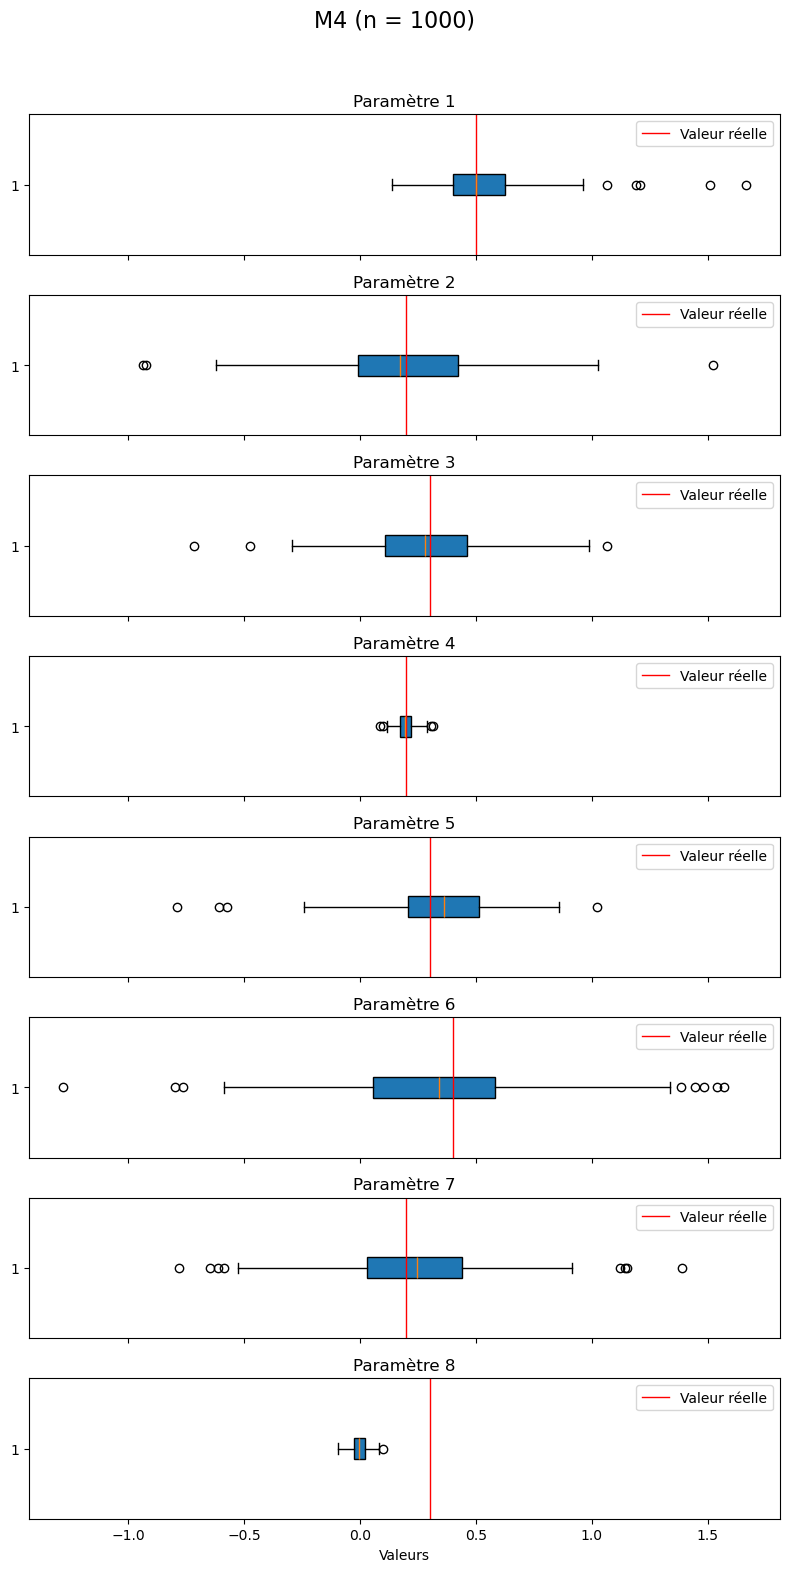

In [25]:
if model == 'M1':
    repest = repestim
elif model == 'M2':
    repest = repestimM2
elif model == 'M3':
    repest = repestimM3
elif model == 'M4':
    repest = repestimM4
else:
    print("model does not exist")

# Create a figure with subplots
fig, axs = plt.subplots(num_params, 1, figsize=(8, 2 * num_params), sharex=True)
# Loop through each parameter and create a box plot
for i in range(num_params):
    axs[i].boxplot(repest[i, :], vert=False, patch_artist=True)
    axs[i].axvline(x=real_params[i], color='r', linestyle='-', linewidth=1, label='Valeur réelle')
    axs[i].set_title(f'Paramètre {i + 1}')
    axs[i].legend()

fig.suptitle(f"{model} (n = {size})", fontsize=16)

plt.xlabel('Valeurs')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()